In [33]:
!pip install igraph

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import scipy.sparse as sp
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import igraph as ig
import torch
from torch import nn
from torch.nn import functional as F
from torch.nn import Parameter
import torch.optim as optim
import math
import time

In [2]:
def import_node_db():
  data_list = ["Stockholm","Saarbrucken","Freiburg"]
  floor_list1 = ["floor4_1","floor4_2","floor4_3","floor4_4","floor4_5","floor4_6","floor4_7","floor4_8",
                   "floor5_1","floor5_2","floor5_3","floor5_4","floor5_5","floor5_6","floor5_7","floor5_8",
                   "floor6_1","floor6_2","floor6_3","floor6_4","floor6_5","floor6_6","floor6_7","floor6_8","floor6_9",
                   "floor6_10","floor6_11","floor6_12","floor6_13","floor6_14","floor6_15","floor6_16","floor6_17","floor6_18",
                   "floor7_1","floor7_2","floor7_3","floor7_4","floor7_5","floor7_6","floor7_7","floor7_8"]
  floor_list2 = ["seq1_cloudy1","seq1_cloudy2","seq1_cloudy3","seq1_night1","seq1_night2","seq1_night3",
                 "seq2_cloudy1","seq2_cloudy2","seq2_cloudy3","seq2_night1","seq2_night2","seq2_night3",
                 "seq3_cloudy1","seq3_cloudy2","seq3_cloudy3","seq3_cloudy4","seq3_cloudy5","seq3_night1","seq3_night2","seq3_night3","seq3_sunny1","seq3_sunny2","seq3_sunny3",
                 "seq4_cloudy1","seq4_cloudy2","seq4_cloudy3","seq4_night1","seq4_night2","seq4_night3","seq4_sunny1","seq4_sunny2","seq4_sunny3"]

  floor_list3 = ["seq1_cloudy1","seq1_cloudy2","seq1_cloudy3","seq1_night1","seq1_night2","seq1_night3","seq1_sunny1","seq1_sunny2","seq1_sunny3","seq1_sunny4",
                 "seq2_cloudy1","seq2_cloudy2","seq2_cloudy3","seq2_night1","seq2_night2","seq2_night3","seq2_sunny1","seq2_sunny2","seq2_sunny3","seq2_sunny4",
                 "seq3_cloudy1","seq3_cloudy2","seq3_cloudy3","seq3_sunny1","seq3_sunny2","seq3_sunny3"]    

  flist = [floor_list1,floor_list2,floor_list3]
  # return flist
  node_df_list = []
  for i in range(3):
    df_list = []
    for j in flist[i]:
      node_df1 = pd.read_table("F:/prooo/dataset/{}/{}/nodes.dat".format(data_list[i],j),sep="\s+")
      # node_df1['floor']=j
      # node_df1['loc']=data_list[i]
      node_df1['locfloor']=data_list[i]+"-"+j
      df_list.append(node_df1)
    node_df_list.append(pd.concat(df_list,ignore_index=True))
  main_list = pd.concat(node_df_list,ignore_index=True)
  return main_list
data = import_node_db()
data

,node_id,placeholder,x,y,d1,d2,d3,d4,label,d5,...,neighbor_ID_5,affordance_5,view_num_5,neighbor_ID_6,affordance_6,view_num_6,neighbor_ID_7,affordance_7,view_num_7,locfloor
0,0,0,-1.000001,-0.200001,-1.025785,-0.097851,-1.000001,-0.200001,EV,1.205846e+09,...,-1,-1.0,3,-1,-1.0,2,-1,-1.0,0,Stockholm-floor4_1
1,1,0,-0.140001,0.259999,-0.303640,-0.002786,-0.200001,0.599999,EV,1.205846e+09,...,-1,-1.0,2,-1,-1.0,1,-1,-1.0,0,Stockholm-floor4_1
2,2,0,-2.020001,-0.080001,-2.015833,-0.073241,-1.800001,-0.200001,DW,1.205846e+09,...,-1,-1.0,5,-1,-1.0,2,-1,-1.0,1,Stockholm-floor4_1
3,3,0,-2.860001,0.499999,-3.019827,0.500790,-2.600001,0.599999,CR,1.205846e+09,...,-1,-1.0,2,-1,-1.0,1,-1,-1.0,0,Stockholm-floor4_1
4,4,0,-2.820001,-0.500001,-2.986465,-0.450972,-2.600001,-0.200001,CR,1.205846e+09,...,-1,-1.0,5,-1,-1.0,4,-1,-1.0,1,Stockholm-floor4_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12004,87,1,-0.960001,0.479999,-1.330054,-1.122218,-1.200001,0.239999,BA,1.152960e+09,...,-1,-1.0,2,-1,-1.0,1,-1,-1.0,0,Freiburg-seq3_sunny3
12005,88,1,0.599999,-0.860001,0.311301,-2.006270,0.399999,-0.560001,BA,1.152960e+09,...,-1,-1.0,2,-1,-1.0,1,-1,-1.0,0,Freiburg-seq3_sunny3
12006,89,0,0.579999,-1.660001,0.494374,-2.048347,0.399999,-1.360001,BA,1.152960e+09,...,-1,-1.0,3,-1,-1.0,1,-1,-1.0,0,Freiburg-seq3_sunny3
12007,90,0,0.719999,-2.480001,0.738757,-2.104682,0.399999,-2.160001,BA,1.152960e+09,...,-1,-1.0,4,-1,-1.0,1,-1,-1.0,0,Freiburg-seq3_sunny3


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12009 entries, 0 to 12008
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   node_id        12009 non-null  int64  
 1   placeholder    12009 non-null  int64  
 2   x              12009 non-null  float64
 3   y              12009 non-null  float64
 4   d1             12009 non-null  float64
 5   d2             12009 non-null  float64
 6   d3             12009 non-null  float64
 7   d4             12009 non-null  float64
 8   label          12009 non-null  object 
 9   d5             12009 non-null  float64
 10  neighbor_ID_0  12009 non-null  int64  
 11  affordance_0   12009 non-null  float64
 12  view_num_0     12009 non-null  int64  
 13  neighbor_ID_1  12009 non-null  int64  
 14  affordance_1   12009 non-null  float64
 15  view_num_1     12009 non-null  int64  
 16  neighbor_ID_2  12009 non-null  int64  
 17  affordance_2   12009 non-null  float64
 18  view_n

In [4]:
data['locfloor'].unique()

array(['Stockholm-floor4_1', 'Stockholm-floor4_2', 'Stockholm-floor4_3',
       'Stockholm-floor4_4', 'Stockholm-floor4_5', 'Stockholm-floor4_6',
       'Stockholm-floor4_7', 'Stockholm-floor4_8', 'Stockholm-floor5_1',
       'Stockholm-floor5_2', 'Stockholm-floor5_3', 'Stockholm-floor5_4',
       'Stockholm-floor5_5', 'Stockholm-floor5_6', 'Stockholm-floor5_7',
       'Stockholm-floor5_8', 'Stockholm-floor6_1', 'Stockholm-floor6_2',
       'Stockholm-floor6_3', 'Stockholm-floor6_4', 'Stockholm-floor6_5',
       'Stockholm-floor6_6', 'Stockholm-floor6_7', 'Stockholm-floor6_8',
       'Stockholm-floor6_9', 'Stockholm-floor6_10', 'Stockholm-floor6_11',
       'Stockholm-floor6_12', 'Stockholm-floor6_13',
       'Stockholm-floor6_14', 'Stockholm-floor6_15',
       'Stockholm-floor6_16', 'Stockholm-floor6_17',
       'Stockholm-floor6_18', 'Stockholm-floor7_1', 'Stockholm-floor7_2',
       'Stockholm-floor7_3', 'Stockholm-floor7_4', 'Stockholm-floor7_5',
       'Stockholm-floor7_6', 'Stock

In [5]:
df = data.drop(['d1','d2','d3','d4','d5'], axis=1)

In [6]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['locfloor']= label_encoder.fit_transform(df['locfloor'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12009 entries, 0 to 12008
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   node_id        12009 non-null  int64  
 1   placeholder    12009 non-null  int64  
 2   x              12009 non-null  float64
 3   y              12009 non-null  float64
 4   label          12009 non-null  object 
 5   neighbor_ID_0  12009 non-null  int64  
 6   affordance_0   12009 non-null  float64
 7   view_num_0     12009 non-null  int64  
 8   neighbor_ID_1  12009 non-null  int64  
 9   affordance_1   12009 non-null  float64
 10  view_num_1     12009 non-null  int64  
 11  neighbor_ID_2  12009 non-null  int64  
 12  affordance_2   12009 non-null  float64
 13  view_num_2     12009 non-null  int64  
 14  neighbor_ID_3  12009 non-null  int64  
 15  affordance_3   12009 non-null  float64
 16  view_num_3     12009 non-null  int64  
 17  neighbor_ID_4  12009 non-null  int64  
 18  afford

In [7]:
df['locfloor'].unique()

array([58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
       84, 85, 86, 87, 88, 89, 90, 91, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       92, 93, 94, 95, 96, 97, 98, 99, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])

In [8]:
def get_edge(data):
  edges = []
  if(data.neighbor_ID_0!=-1):
    edges.append([data.node_id,data.neighbor_ID_0,data.locfloor])
  else:
    pass
  if(data.neighbor_ID_1!=-1):
    edges.append([data.node_id,data.neighbor_ID_1,data.locfloor])
  else:
    pass
  if(data.neighbor_ID_2!=-1):
    edges.append([data.node_id,data.neighbor_ID_2,data.locfloor])
  else:
    pass
  if(data.neighbor_ID_3!=-1):
    edges.append([data.node_id,data.neighbor_ID_3,data.locfloor])
  else:
    pass
  if(data.neighbor_ID_4!=-1):
    edges.append([data.node_id,data.neighbor_ID_4,data.locfloor])
  else:
    pass
  if(data.neighbor_ID_5!=-1):
    edges.append([data.node_id,data.neighbor_ID_5,data.locfloor])
  else:
    pass
  if(data.neighbor_ID_6!=-1):
    edges.append([data.node_id,data.neighbor_ID_6,data.locfloor])
  else:
    pass
  if(data.neighbor_ID_7!=-1):
    edges.append([data.node_id,data.neighbor_ID_7,data.locfloor])
  else:
    pass
  return edges

In [9]:
graph_edges = []
for i,raw_data in df.iterrows():
  graph_edges.extend(get_edge(raw_data))
edges_unordered = np.array(graph_edges)
edges_unordered.shape

(42769, 3)

In [10]:
def encode_onehot(labels):
    classes = set(labels)
    classes_dict = {c: np.identity(len(classes))[i, :] for i, c in enumerate(classes)}
    labels_onehot = np.array(list(map(classes_dict.get, labels)), dtype=np.int32)
    return labels_onehot

In [11]:
labels = encode_onehot(np.array(df['label']))
labels.shape

(12009, 22)

In [12]:
idx = np.array(df.index, dtype=np.int32)
idx_map = {j: i for i, j in enumerate(idx)}
idx.shape

(12009,)

In [13]:
df = df.drop(['node_id','label'], axis=1)

In [14]:
labels.shape

(12009, 22)

In [15]:
features = sp.csr_matrix(df, dtype=np.float32)
edges = np.array(edges_unordered)
print(edges.shape)
adj = sp.coo_matrix(
        (np.ones(edges.shape[0]), 
        (edges[:, 0], edges[:, 1])),
        shape=(labels.shape[0], labels.shape[0]),
        dtype=np.float32
)

(42769, 3)


In [16]:
def normalize(mx):
    """
    Row-normalize sparse matrix
    """
    rowsum = np.array(mx.sum(1))
    r_inv = np.power(rowsum, -1).flatten()
    r_inv[np.isinf(r_inv)] = 0.
    r_mat_inv = sp.diags(r_inv)
    mx = r_mat_inv.dot(mx)
    return mx

In [17]:
features = normalize(features)
adj = normalize(adj + sp.eye(adj.shape[0]))

In [18]:
idx_train = range(9000)
idx_val = range(9000, 11000)
idx_test = range(11000, 12000)

In [19]:
def sparse_mx_to_torch_sparse_tensor(sparse_mx):
    """
    Convert a scipy sparse matrix to a torch sparse tensor.
    """
    sparse_mx = sparse_mx.tocoo().astype(np.float32)
    indices = torch.from_numpy(
        np.vstack((sparse_mx.row, sparse_mx.col)).astype(np.int64))
    values = torch.from_numpy(sparse_mx.data)
    shape = torch.Size(sparse_mx.shape)
    return torch.sparse.FloatTensor(indices, values, shape)

In [20]:
features = torch.FloatTensor(np.array(features.todense()))
labels = torch.LongTensor(np.where(labels)[1])
adj = sparse_mx_to_torch_sparse_tensor(adj)

In [21]:
idx_train = torch.LongTensor(idx_train)
idx_val = torch.LongTensor(idx_val)
idx_test = torch.LongTensor(idx_test)

In [22]:
torch.cuda.is_available()

True

In [23]:
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [24]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.nn import Parameter
import math


class GraphConvolution(nn.Module):
    def __init__(self, in_features, out_features, bias=True):
        super(GraphConvolution, self).__init__()

        self.in_features = in_features
        self.out_features = out_features
        self.weight = Parameter(torch.FloatTensor(in_features, out_features))

        if bias:
            self.bias = Parameter(torch.FloatTensor(out_features))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()

    def reset_parameters(self):
        stdv = 1. / math.sqrt(self.weight.size(1))        
        self.weight.data.uniform_(-stdv, stdv)
        if self.bias is not None:
            self.bias.data.uniform_(-stdv, stdv)

    def forward(self, input, adj):
        support = torch.mm(input, self.weight)
        output = torch.spmm(adj, support)
        if self.bias is not None:
            return output + self.bias
        else:
            return output

    def __repr__(self):
        return f'{self.__class__.__name__} ({self.in_features} -> {self.out_features})'


class GCN(nn.Module):
    def __init__(self, nfeat, nhid, nclass, dropout):
        super(GCN, self).__init__()

        self.gc1 = GraphConvolution(nfeat, nhid)
        self.gc2 = GraphConvolution(nhid, nclass)
        self.dropout = dropout

    def forward(self, x, adj):
        x = F.relu(self.gc1(x, adj))
        x = F.dropout(x, self.dropout, training=self.training)
        x = self.gc2(x, adj)
        return F.log_softmax(x, dim=1)

In [25]:
 model = GCN(
        nfeat=features.shape[1],
        nhid=16,
        nclass=labels.max().item() + 1,
        dropout=0.5
    )

In [26]:
optimizer = optim.Adam(
        model.parameters(),
        lr=0.01, 
        weight_decay=5e-4
    )

In [27]:
model.cuda()
features = features.cuda()
adj = adj.cuda()
labels = labels.cuda()
idx_train = idx_train.cuda()
idx_val = idx_val.cuda()
idx_test = idx_test.cuda()

In [28]:
def accuracy(output, labels):
    preds = output.max(1)[1].type_as(labels)
    correct = preds.eq(labels).double()
    correct = correct.sum()
    return correct / len(labels)

In [29]:
def train(model,adj, epoch):
    t = time.time()
    model.train()
    optimizer.zero_grad()
    output = model(features, adj)
    loss_train = F.nll_loss(output[idx_train], labels[idx_train])
    acc_train = accuracy(output[idx_train], labels[idx_train])
    loss_train.backward()
    optimizer.step()

    # if not args.fastmode:
    #     # Evaluate validation set performance separately,
    #     # deactivates dropout during validation run.
    #     model.eval()
    #     output = model(features, adj)

    loss_val = F.nll_loss(output[idx_val], labels[idx_val])
    acc_val = accuracy(output[idx_val], labels[idx_val])
    print('Epoch: {:04d}'.format(epoch+1),
          'loss_train: {:.4f}'.format(loss_train.item()),
          'acc_train: {:.4f}'.format(acc_train.item()),
          'loss_val: {:.4f}'.format(loss_val.item()),
          'acc_val: {:.4f}'.format(acc_val.item()),
          'time: {:.4f}s'.format(time.time() - t))

In [30]:
t_total = time.time()
for epoch in range(100):
  train(model, adj,epoch)
print("Optimization Finished!")
print("Total time elapsed: {:.4f}s".format(time.time() - t_total))

Epoch: 0001 loss_train: 3.0927 acc_train: 0.0341 loss_val: 3.1484 acc_val: 0.0175 time: 4.1439s
Epoch: 0002 loss_train: 3.0719 acc_train: 0.0469 loss_val: 3.1263 acc_val: 0.0325 time: 0.0000s
Epoch: 0003 loss_train: 3.0520 acc_train: 0.0591 loss_val: 3.1017 acc_val: 0.0415 time: 0.0156s
Epoch: 0004 loss_train: 3.0294 acc_train: 0.0656 loss_val: 3.0744 acc_val: 0.0635 time: 0.0000s
Epoch: 0005 loss_train: 3.0059 acc_train: 0.0724 loss_val: 3.0493 acc_val: 0.0755 time: 0.0218s
Epoch: 0006 loss_train: 2.9814 acc_train: 0.0854 loss_val: 3.0208 acc_val: 0.0865 time: 0.0000s
Epoch: 0007 loss_train: 2.9566 acc_train: 0.0901 loss_val: 2.9949 acc_val: 0.1080 time: 0.0000s
Epoch: 0008 loss_train: 2.9318 acc_train: 0.1009 loss_val: 2.9593 acc_val: 0.1270 time: 0.0000s
Epoch: 0009 loss_train: 2.9054 acc_train: 0.1087 loss_val: 2.9293 acc_val: 0.1325 time: 0.0000s
Epoch: 0010 loss_train: 2.8809 acc_train: 0.1177 loss_val: 2.8988 acc_val: 0.1520 time: 0.0156s
Epoch: 0011 loss_train: 2.8535 acc_train

In [31]:
def test(model):
    model.eval()
    output = model(features, adj)
    loss_test = F.nll_loss(output[idx_test], labels[idx_test])
    acc_test = accuracy(output[idx_test], labels[idx_test])
    print("Test set results:", "loss= {:.4f}".format(loss_test.item()), "accuracy= {:.4f}".format(acc_test.item()))

In [32]:
test(model)

Test set results: loss= 2.5696 accuracy= 0.3950


In [39]:
ig_edges = []
for i in graph_edges:
    ig_edges.append((i[0],i[1]))
ig_edges

[(0, 1),
 (0, 2),
 (1, 0),
 (2, 0),
 (2, 3),
 (2, 4),
 (3, 2),
 (3, 4),
 (3, 6),
 (3, 9),
 (4, 2),
 (4, 3),
 (4, 5),
 (4, 6),
 (5, 2),
 (5, 4),
 (5, 7),
 (5, 8),
 (6, 4),
 (6, 3),
 (6, 9),
 (6, 85),
 (7, 5),
 (7, 88),
 (7, 108),
 (7, 109),
 (8, 5),
 (8, 86),
 (8, 87),
 (8, 88),
 (9, 3),
 (9, 6),
 (9, 10),
 (9, 11),
 (10, 9),
 (10, 11),
 (10, 12),
 (11, 9),
 (11, 10),
 (11, 12),
 (12, 11),
 (12, 10),
 (12, 13),
 (12, 14),
 (12, 15),
 (13, 12),
 (13, 14),
 (13, 16),
 (13, 79),
 (14, 12),
 (14, 13),
 (14, 15),
 (14, 16),
 (14, 17),
 (15, 12),
 (15, 14),
 (15, 16),
 (15, 17),
 (15, 18),
 (16, 14),
 (16, 17),
 (16, 13),
 (16, 40),
 (17, 14),
 (17, 15),
 (17, 18),
 (17, 16),
 (17, 40),
 (18, 15),
 (18, 17),
 (18, 19),
 (18, 20),
 (19, 18),
 (19, 20),
 (19, 21),
 (19, 22),
 (19, 23),
 (20, 18),
 (20, 19),
 (20, 23),
 (20, 24),
 (21, 19),
 (22, 19),
 (22, 20),
 (22, 23),
 (22, 25),
 (23, 19),
 (23, 20),
 (23, 22),
 (23, 24),
 (23, 25),
 (23, 26),
 (24, 20),
 (24, 23),
 (24, 26),
 (25, 23),
 (2

In [37]:
import igraph as ig
import matplotlib.pyplot as plt

# Construct a graph with 5 vertices
n_vertices = df.shape[0]
g = ig.Graph(n_vertices, ig_edges)

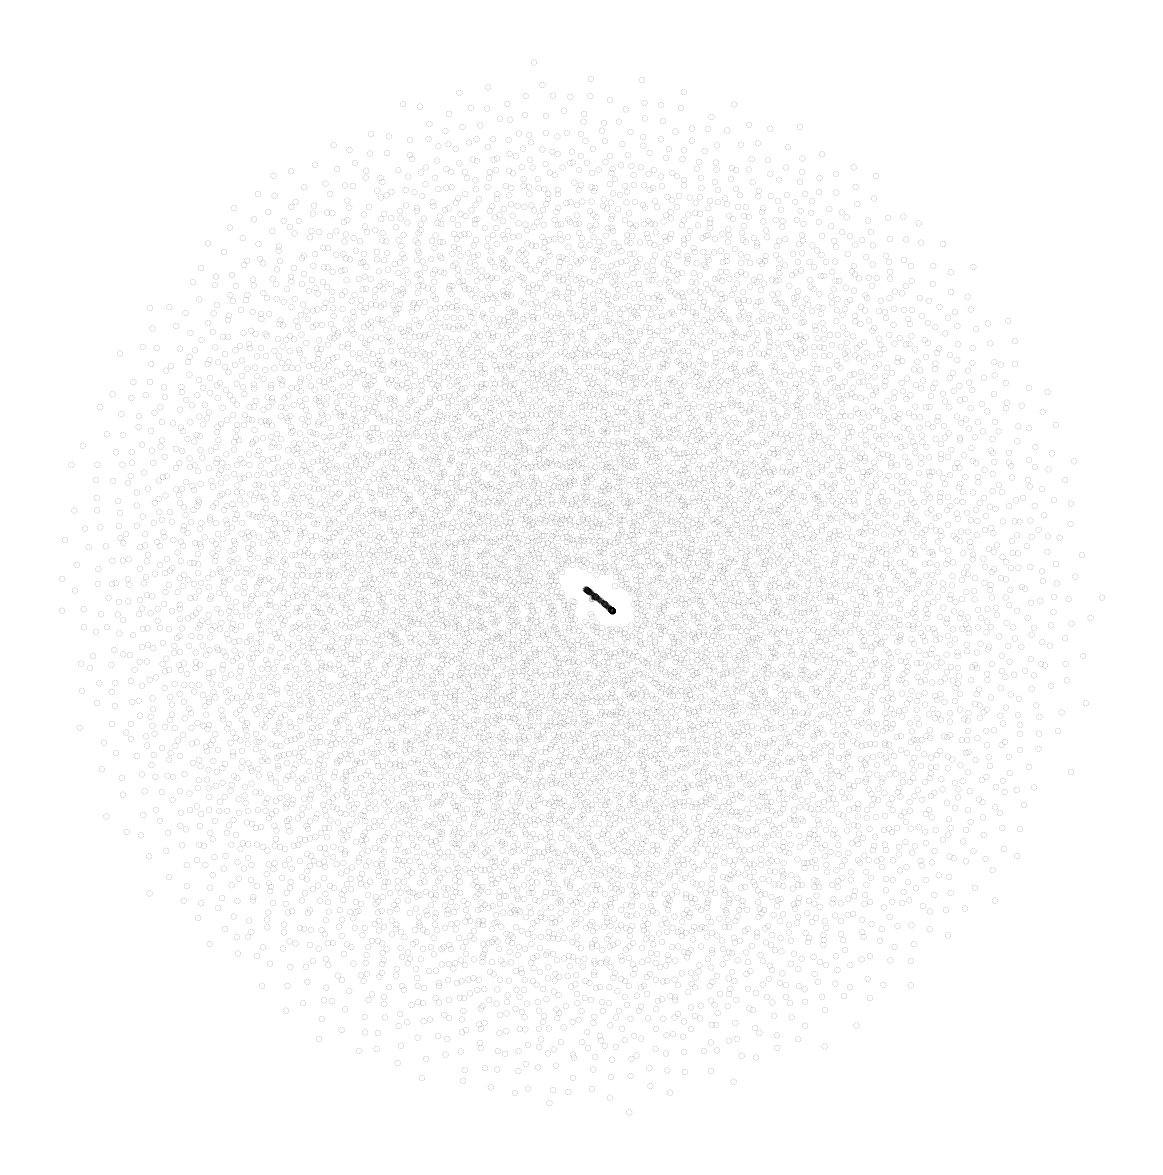

In [38]:
fig, ax = plt.subplots(figsize=(15,15))
ig.plot(
    g,
    target=ax, # print nodes in a circular layout
    vertex_size=0.1,
    vertex_frame_width=4.0,
    vertex_label_size=7.0,
)
plt.show()